# **King County, Seattle Housing Selling Price**

# Methodology

To evaluate the King's country dataset, I have chosen to use the following steps:
- Business Understanding
- Data Understanding and Data Prep
 - Obtain Data
 - Scrub Data
 - Explore Data
- Modeling
- Interpret
- Evaluation
- Deployment of Model

This is a combination of the OSEMN method explained at:[insert link here] and the CRISP-DM method explained at:[insert line here]. I found that the OSEMN method explained the data science process, but did not provide a framework for contextualization of the model or original data; whereas, the CRISP-DM method provided the business understanding and deployment steps to handle defining the scope of a project. I found the descriptors in the CRISP-DM method for projects did not specify obtaining or cleaning the data, which is where the OSEMN method shines. Both methods have strengths and weakness; as a result, I decided to pull the details from both to enrich my project building experience and to always keep the client in mind by expanding on the steps of both methodologies.

# Business Understanding

To develop an understanding of the nature of the business of the housing market, I'm referencing my own experience apartment shopping, the things I learned about what's important to me as a consumer of housing, an article written by one of the top real estate leaders in the northeast about common seller's questions, and the information provided in the dataset. 

In my own experience, when looking for an apartment, as a home buyer, I am looking for livability and the condition of the home. Will I need to invest to ensure that the place meets my personal standard? Do the features available meet my needs? For instance, in the past, a one bedroom apartment was sufficent. However, now I'm looking to use a bedroom as an office, so I am looking for two bedroom apartments, but one bathroom is still okay. To conclude, as a consumer I look at the quality of my investment and then determine if the space meets my needs.

From a real estate perspective, some of the most frequently asked questions by a home seller include the following. What does the market look like right now? At what point in the year should I sell? How can I improve my home to sell? What price should I set? What is the actual value of my home? insert [reference] here. It seems as if a seller is trying to pinpoint where they are on the sliding scale of value for their surrounding area, and maximizing profit based on this scale.

The data provides both categorical and continuous data points that fall into a few different categories. The continuous data deals with square footage, time, and location; whereas the categorical data includes aspects of the home that cannot change, one of which is whether or not the property is waterfront, and opinions about the home. This is a nice mixture of data that buyers and sellers would be interested in. There are some data points that include information about the surrounding neighborhood to develop the type of sliding scale of home value as well as the condition of the home and included features.

# Data Understanding and Data Prep
## Scrub Data Highlights
This first decision about changing the sqft_basement variable into a binary value really elevated my adjusted r-squared value for the data set.

In [12]:
df_clean.sqft_basement = df_clean.sqft_basement.astype(float)
df_clean.sqft_basement.value_counts()

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
850.0        71
          ...  
2600.0        1
1008.0        1
1281.0        1
274.0         1
417.0         1
2850.0        1
415.0         1
2240.0        1
243.0         1
143.0         1
1525.0        1
862.0         1
172.0         1
225.0         1
2490.0        1
935.0         1
3000.0        1
2500.0        1
1990.0        1
1840.0        1
1548.0        1
518.0         1
915.0         1
266.0         1
1930.0        1
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Len

Since the sqft_basement data type is pretty evenly divided between 0 and not zero, it might be useful to change this over to a binary type of data.

In [13]:
# change sqft_basement over into a categorical type
df_clean.loc[df_clean['sqft_basement'] != 0, 'sqft_basement'] = 1
basement = df_clean['sqft_basement'].astype(str)
# print(len(basement)) # unhash to verify that all rows have been transformed
# print(len(df_clean)) # unhash to verify that all rows have been transformed
df_clean.sqft_basement.value_counts() # unhash to verify the above code worked

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.0    13250
1.0     8284
Name: sqft_basement, dtype: int64

# Modeling - 1.0
Below is the model after scrubbing and exploring have been managed, let's see what the model picks up.

In [25]:
outcome = 'price'
predictors = kc_housing.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model_1 = ols(formula= formula, data=kc_housing).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     234.7
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:22:39   Log-Likelihood:            -2.8669e+05
No. Observations:               21534   AIC:                         5.743e+05
Df Residuals:                   21062   BIC:                         5.781e+05
Df Model:                         471                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.483e+07   5.73e+06     -6.078      0.000   -4.61e+07   -2.36e+07
date[T.1/12/2015]   3.096e+04    1.5e+05      0.206      0.837   -2.63e+05    3.25e+05
date[T.1/13/2015]   5.102e+04    1.5e+05      0.340      0.734   -2.43e+05    3.45e+05
date[T.1/14/2015]   1.853e+04    1.5e+05      0.124      0.902   -2.75e+05    3.12e+05
date[T.1/15/2015]   3.572e+04    1.5e+05      0.238      0.812   -2.58e+05     3.3e+05
date[T.1/16/2015]  -1.322e+04    1.5e+05     -0.088      0.930   -3.07e+05     2.8e+05
date[T.1/17/2015]   1.051e+05    2.1e+05      0.501      0.616   -3.06e+05    5.16e+05
date[T.1/19/2015]   -1.53e+04   1.57e+05     -0.097      0.923   -3.24e+05    2.93e+05
date[T.1/2/2015]    5.344e+04    1.5e+05      0.356      0.722    -2.4e+05    3.47e+05
date[T.1/20/2015]   5.687e+04    1.5e+05      0.379      0.704   -2.37e+05    3.51e+05
date[T.1/21/2015]   4.765e+04    1.5e+05      0.319      0.750   -2.46e+05    3.41e+05
date[T.1/22/2015]   2.961e+04    1.5e+05      0.198      0.843   -2.64e+05    3.23e+05
date[T.1/23/2015]   4688.4355    1.5e+05      0.031      0.975   -2.89e+05    2.98e+05
date[T.1/24/2015]  -1.021e+05   1.66e+05     -0.616      0.538   -4.27e+05    2.23e+05
date[T.1/25/2015]   5.641e+04   1.71e+05      0.329      0.742   -2.79e+05    3.92e+05
date[T.1/26/2015]   1035.4509    1.5e+05      0.007      0.994   -2.93e+05    2.95e+05
date[T.1/27/2015]   5.216e+04    1.5e+05      0.349      0.727   -2.41e+05    3.45e+05
date[T.1/28/2015]   2.297e+04   1.49e+05      0.154      0.878    -2.7e+05    3.16e+05
date[T.1/29/2015]   4.791e+04    1.5e+05      0.319      0.749   -2.46e+05    3.42e+05
date[T.1/30/2015]    3.81e+04    1.5e+05      0.253      0.800   -2.57e+05    3.33e+05
date[T.1/31/2015]   2297.0867    2.1e+05      0.011      0.991   -4.09e+05    4.14e+05
date[T.1/5/2015]    4.338e+04    1.5e+05      0.290      0.772    -2.5e+05    3.36e+05
date[T.1/6/2015]    4.436e+04    1.5e+05      0.296      0.768    -2.5e+05    3.38e+05
date[T.1/7/2015]    6.496e+04    1.5e+05      0.434      0.664   -2.28e+05    3.58e+05
date[T.1/8/2015]    1.616e+04    1.5e+05      0.108      0.914   -2.77e+05     3.1e+05
date[T.1/9/2015]     9.15e+04    1.5e+05      0.609      0.543   -2.03e+05    3.86e+05
date[T.10/1/2014]   4.421e+04   1.49e+05      0.296      0.767   -2.48e+05    3.37e+05
date[T.10/10/2014]   1.42e+04   1.49e+05      0.095      0.924   -2.78e+05    3.07e+05
date[T.10/11/2014]  4.496e+05   1.82e+05      2.469      0.014    9.26e+04    8.07e+05
date[T.10/12/2014]  5.767e+04   1.71e+05      0.337      0.736   -2.78e+05    3.93e+05
date[T.10/13/2014]  5.718e+04   1.49e+05      0.383      0.702   -2.36e+05     3.5e+05
date[T.10/14/2014]  4.347e+04   1.49e+05      0.292      0.771   -2.49e+05    3.36e+05
date[T.10/15/2014]   1.95e+04   1.49e+

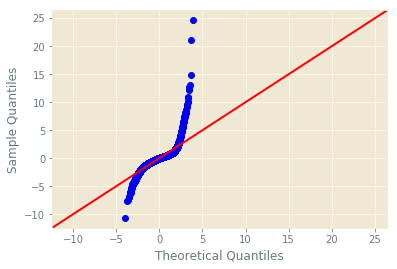

In [26]:
# q-q plot
residuals = model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

The adjusted r-squared vales is 0.843, which is pretty good for a raw data set. Our goal is to reach 0.800. The following variables are statistically significant (meaning their p-value is less than 0.05):
- zipcode = 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98029, 98033, 98034, 98038, 98039, 98040, 98045, 98052, 98053, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98177, 98198, 98199
- yr_built = 1901, 1908, 1952, 1953, 1954, 1955, 1960, 1961, 1962, 1964, 1965, 1966, 1974, 1977, 1978, 1979, 1986, 1987, 1988, 1990, 1991, 1992, 1997, 1998, 2000, 2001, 2002, 2004, 2005, 2006, 2007
- bathrooms = 4.25, 4.75, 5.0, 5.25, 5.5, 5.75, 6, 6.25, 6.75, 7.75, 8
- waterfront = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 12, 13
- lat
- long
- sqft_lot
- sqft_living
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15
- bedrooms
- floors
- yr_renovated

The only column of data without statistically significant data is the **date** column, so let's **drop** it.

It looks like we need a management plan for zipcode and yr_built. I'd like to **see where these signifcant zipcodes** are located. In yr_built, there are several spans of time where some years contibuted to price. It might be useful to **categorize these yr_built** separately from every other, because advice to these consumers will be different. It also looks as if larger homes need to be separated out as well, because homes with 4.25 bathrooms or more contribute to price, and could be masking interactions for smaller homes, which is where I want to focus my information and recommendations to the client.

However, before we move forward with this three step cleaning plan, let's remove outliers.

## EDA Highlights

The primary discoveries in this section of the project included:
- Zipcode helping to determine price, by the end of the model, 7 of the total 70 zipcode respresented were not significant
- Year built having some significance after the 1950s, almost split up by decade (evidenced in the model above)
- Sqft_lot15 was not signicant and the transformed sqft_basement information wasn't significant to the model either
- In a colinearity check, sqft_above was dropped, and more suprisingly, sqft_living was colinear with price and was dropped as well
- Bedroom Exploration that resulted in a very useful feature
- Transformations for sqft_lot and sqft_living15 and price

## Zipcode Exploration and Visualization
Where are the significant zipcodes located?

In [35]:
# add insignificant zipcodes to map using a red marker. 
total_zip = np.array(sorted(kc_housing['zipcode'].unique()))
sig_zip = np.array(sorted(sig_zip))
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))
in_sig_zip = Diff(total_zip,sig_zip)
in_sig_zip = sorted(in_sig_zip)
# in_sig_zip = [98001, 98002, 98003, 98011, 98019, 98028, 98030, 
            #   98031, 98032, 98042, 98055, 98058, 98092, 98133,
            #   98146, 98148, 98155, 98166, 98168, 98178, 98188]
# in_sig_zipll = [(47.30749,-122.26591), (47.31005,-122.20918), (47.30776,-122.31121), (47.75028,-122.20465),
                # (47.73320,-121.79933), (47.75488,-122.24710), (47.36236,-122.19828), (47.41390,-122.19809), 
                # (47.39233,-122.26459), (47.36451,-122.10208), (47.45108,-122.19632), (47.43509,-122.11652), 
                # (47.28985,-122.10962), (47.73957,-122.34495), (47.50035,-122.36334), (47.44655,-122.32183), 
                # (47.75530,-122.29591), (47.44796,-122.35840), (47.49011,-122.29153), (47.49637,-122.25194),
                # (47.44821,-122.27785)]

popup_98001 = "98001"
marker_98001 = folium.Marker([47.30749,-122.26591], popup=popup_98001, icon=folium.Icon(color='red'))
popup_98002 = "98002"
marker_98002 = folium.Marker([47.31005,-122.20918], popup=popup_98002, icon=folium.Icon(color='red'))
popup_98003 = "98003"
marker_98003 = folium.Marker([47.30776,-122.31121], popup=popup_98003, icon=folium.Icon(color='red'))


popup_98028 = "98028"
marker_98028 = folium.Marker([47.75488,-122.24710], popup=popup_98028, icon=folium.Icon(color='red'))
popup_98030 = "98030"
marker_98030 = folium.Marker([47.36236,-122.19828], popup=popup_98030, icon=folium.Icon(color='red'))

popup_98031 = "98031"
marker_98031 = folium.Marker([47.41390,-122.19809], popup=popup_98031, icon=folium.Icon(color='red'))
popup_98032 = "98032"
marker_98032 = folium.Marker([47.39233,-122.26459], popup=popup_98032, icon=folium.Icon(color='red'))
popup_98042 = "98042"
marker_98042 = folium.Marker([47.36451,-122.10208], popup=popup_98042, icon=folium.Icon(color='red'))
popup_98055 = "98055"
marker_98055 = folium.Marker([47.45108,-122.19632], popup=popup_98055, icon=folium.Icon(color='red'))

popup_98092 = "98092"
marker_98092 = folium.Marker([47.28985,-122.10962], popup=popup_98092, icon=folium.Icon(color='red'))


popup_98146 = "98146"
marker_98146 = folium.Marker([47.50035,-122.36334], popup=popup_98146, icon=folium.Icon(color='red'))
popup_98148 = "98148"
marker_98148 = folium.Marker([47.44655,-122.32183], popup=popup_98148, icon=folium.Icon(color='red'))
popup_98155 = "98155"
marker_98155 = folium.Marker([47.75530,-122.29591], popup=popup_98155, icon=folium.Icon(color='red'))
popup_98166 = "98166"
marker_98166 = folium.Marker([47.44796,-122.35840], popup=popup_98166, icon=folium.Icon(color='red'))
popup_98168 = "998168"
marker_98168 = folium.Marker([47.49011,-122.29153], popup=popup_98168, icon=folium.Icon(color='red'))
popup_98178 = "98178"
marker_98178 = folium.Marker([47.49637,-122.25194], popup=popup_98178, icon=folium.Icon(color='red'))
popup_98188 = "98188"
marker_98188 = folium.Marker([47.44821,-122.27785], popup=popup_98188, icon=folium.Icon(color='red'))

sig_zip_map.add_child(marker_98001)
sig_zip_map.add_child(marker_98002)
sig_zip_map.add_child(marker_98003)


sig_zip_map.add_child(marker_98028)
sig_zip_map.add_child(marker_98030)
sig_zip_map.add_child(marker_98031)
sig_zip_map.add_child(marker_98032)
sig_zip_map.add_child(marker_98042)
sig_zip_map.add_child(marker_98055)

sig_zip_map.add_child(marker_98092)

sig_zip_map.add_child(marker_98146)
sig_zip_map.add_child(marker_98148)
sig_zip_map.add_child(marker_98155)
sig_zip_map.add_child(marker_98166)
sig_zip_map.add_child(marker_98168)
sig_zip_map.add_child(marker_98178)
sig_zip_map.add_child(marker_98188)

sig_zip_map.save('price where zipcodes matter.html')
sig_zip_map

It looks like there isn't a pattern to where zipcodes determine price, but there is a pattern where zipcodes don't necessarily determine price. This might be worth investigating further as an aside to clients who live in this specific zone. For the purposes of the model, I will not be altering this data in any way at this time.

## Year Bulit Exploration and Visualization
It seemed like year built played a part in the price for houses built after the 1950s, but there seems to be some seperation between the decades. Let's run a model for homes built within that time.

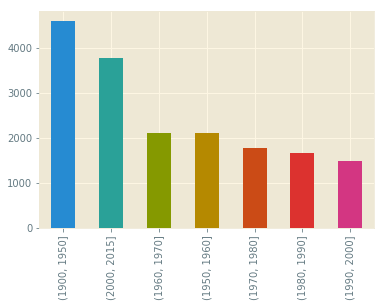

In [36]:
# Post 1950s by decades is the seperation
bins = [1900, 1950, 1960, 1970, 1980, 1990, 2000, 2015]
# splitting the data
bins_yr_built = pd.cut(kc_housing_mod_1['yr_built'], bins)
# ordering the information
bins_yr_built = bins_yr_built.cat.as_ordered()
# previewing the output
bins_yr_built.value_counts().plot(kind='bar');

Since the target years represent such a small portion of the dataset, I will not alter this column of data, beyond splitting them up in this fashion. But, this provides an avenue for inspection during feature engineering for homes built in these categories.

## Colinearity Check

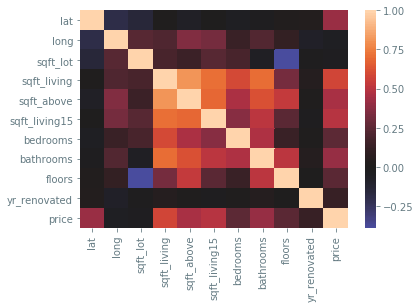

In [43]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

It looks like sqft_living and sqft_above are similiar. Since we converted the sqft_basement data into a category, and sqft_above was related to this insignifcant value, I'm inclined to drop sqft_above.

It looks like sqft_living is more colinear with price, so let's drop sqft_living.

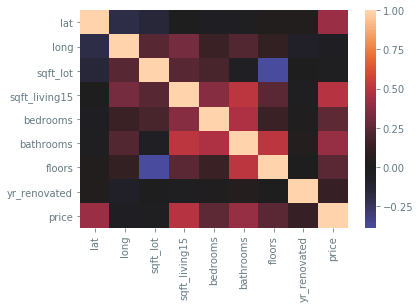

In [49]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

## Bedroom Exploration

In [53]:
# how many homes have more than 6 bedrooms?
bed_count = kc_housing_mod_3.bedrooms.value_counts()
bed_count
print('percentage of homes with more than 6 bedrooms: ' + 
      str(((270 + 38 + 13+ 6 + 10 + 33 + 11) / len(kc_housing.bedrooms)) * 100))

percentage of homes with more than 6 bedrooms: 1.7692950682641404


Let's separate the homes with more than 6 bedrooms from the other types of homes.

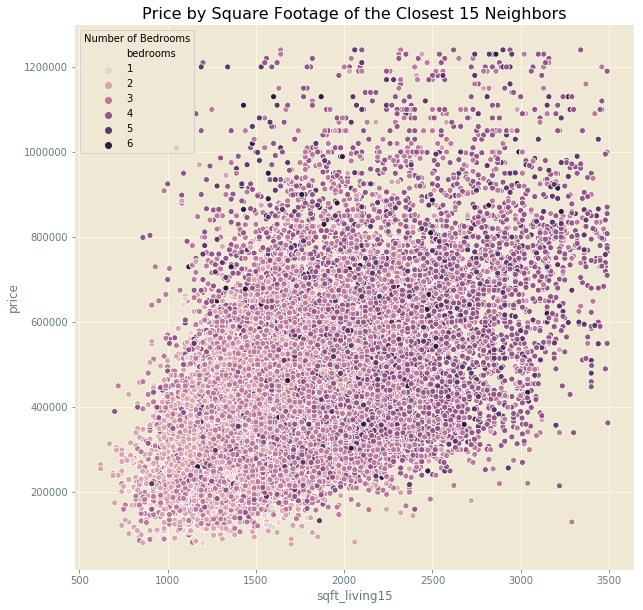

In [57]:
fig08 = plt.figure(figsize=(10,10))
ax1 = fig08.add_subplot(111)
visual5 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1250000]
ax1 = sns.scatterplot(x=visual5['sqft_living15'], 
                      y=visual5['price'], legend='full', hue=visual5['bedrooms'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bedrooms', loc='upper left')
fig08.savefig('Price by Square Footage of the Closest 15 Year Built - Bedrooms.png')

## Transformations

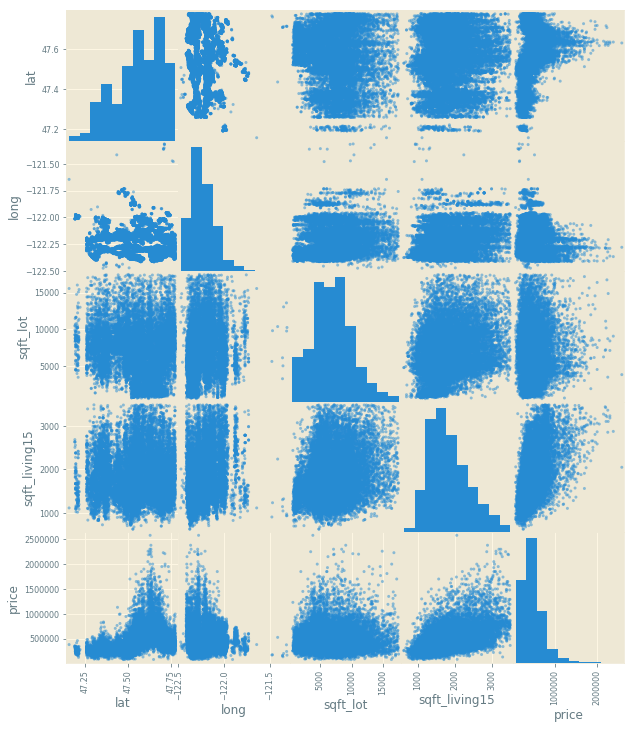

In [63]:
x_cols = ['lat', 'long', 'sqft_lot', 'sqft_living15', 'price']
pd.plotting.scatter_matrix(kc_housing_mod_3[x_cols], figsize=(10,12));

I'm going to leave lat and long alone, they do not contribute to the current model. However, there's a slight skew right on sqft_lot and sqft_living15. I'm going to power transform these values. Also, I am going to log transform price, as it is a finacial variable.

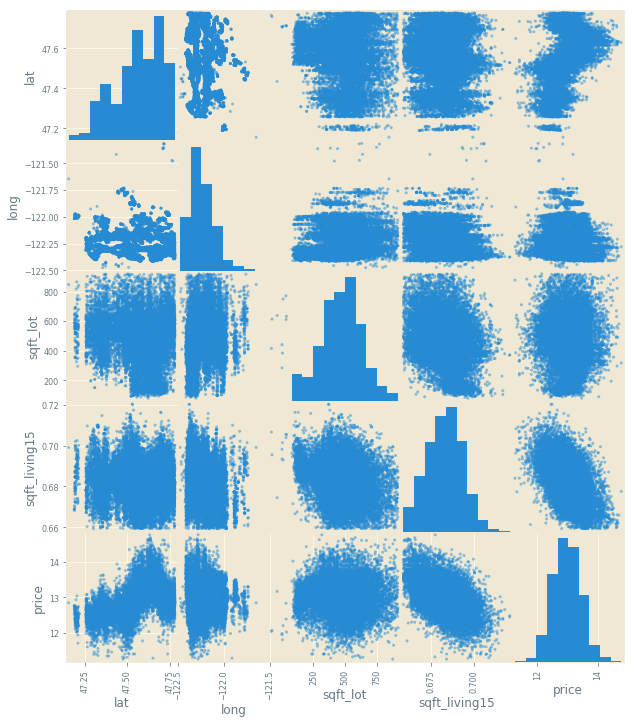

In [68]:
# price log transformation
non_normal = ['price']
for feat in non_normal:
    kc_housing_mod_4[feat] = kc_housing_mod_4[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(kc_housing_mod_4[x_cols], figsize=(10,12));

Now that all of the data is looking much more normal, let's run a new model.

# Modeling Higlights

The best model occurred after the above transformations. This is the model that new features were added to, and evaluated.

In [69]:
outcome = 'price'
predictors = kc_housing_mod_4.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model_5 = ols(formula= formula, data=kc_housing_mod_4).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     909.9
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:23:07   Log-Likelihood:                 4832.3
No. Observations:               17521   AIC:                            -9455.
Df Residuals:                   17416   BIC:                            -8639.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          -26.2093      9.585     -2.734      0.006     -44.996      -7.422
zipcode[T.98002]                                     0.0441      0.018      2.444      0.015       0.009       0.079
zipcode[T.98003]                                     0.0194      0.016      1.182      0.237      -0.013       0.052
zipcode[T.98004]                                     1.0285      0.033     30.874      0.000       0.963       1.094
zipcode[T.98005]                                     0.7458      0.035     21.262      0.000       0.677       0.815
zipcode[T.98006]                                     0.6221      0.029     21.613      0.000       0.566       0.679
zipcode[T.98007]                                     0.6335      0.035     18.008      0.000       0.565       0.702
zipcode[T.98008]                                     0.6458      0.034     18.844      0.000       0.579       0.713
zipcode[T.98010]                                     0.2791      0.038      7.402      0.000       0.205       0.353
zipcode[T.98011]                                     0.3939      0.045      8.844      0.000       0.307       0.481
zipcode[T.98014]                                     0.3721      0.065      5.753      0.000       0.245       0.499
zipcode[T.98019]                                     0.3190      0.049      6.451      0.000       0.222       0.416
zipcode[T.98022]                                     0.1138      0.029      3.922      0.000       0.057       0.171
zipcode[T.98023]                                    -0.0311      0.016     -1.950      0.051      -0.062       0.000
zipcode[T.98024]                                     0.5028      0.056      9.011      0.000       0.393       0.612
zipcode[T.98027]                                     0.6179      0.031     19.669      0.000       0.556       0.680
zipcode[T.98028]                                     0.3307      0.043      7.603      0.000       0.245       0.416
zipcode[T.98029]                                     0.6293      0.034     18.347      0.000       0.562       0.697
zipcode[T.98030]                                     0.0650      0.018      3.561      0.000       0.029       0.101
zipcode[T.98031]                                     0.0783      0.019      4.042      0.000       0.040       0.116
zipcode[T.98032]                                    -0.0199      0.022     -0.921      0.357      -0.062       0.023
zipcode[T.98033]                                     0.7187      0.037     19.185      0.000       0.645       0.792
zipcode[T.98034]                                     0.4930      0.040     12.266      0.000       0.414       0.572
zipcode[T.98038]                         

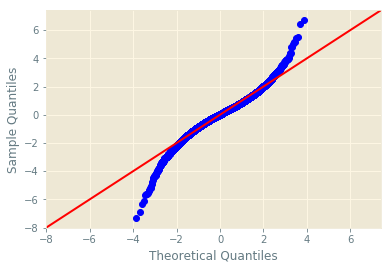

In [70]:
# q-q plot
residuals = model_5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

This model's adjusted r-squared value is 0.844, the highest value yet, above our goal, and focused on our target question. How price is affected in an average sized home. The following values are statistically significant by p-value > 0.05:
- Intercept (this is fantastic)
- All but 5 zipcodes
- yr_built after 1950
- bedrooms = 2, 3, 4, 5, 6
- waterfront = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 4, 5, 12, 13
- lat
- long
- sqft_lot
- sqft_living15
- bathrooms
- yr_renovated

I am very happy with this model's results, most of the data present is statistically significant, and the lower grades are being exposed as statistically significant for the first time. It's time to figure out what all of these numbers mean.

# Interpretation of the Model Highlights

## Visualizations

I'm most happy with how the bedrooms and bathroom visuals turned out.

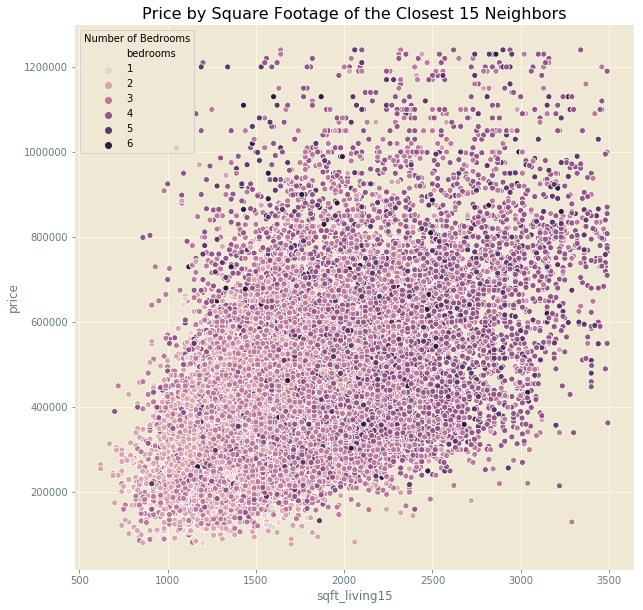

In [71]:
# bedrooms
fig09 = plt.figure(figsize=(10,10))
ax1 = fig09.add_subplot(111)
visual5 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1250000]
ax1 = sns.scatterplot(x=visual5['sqft_living15'], 
                      y=visual5['price'], legend='full', hue=visual5['bedrooms'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bedrooms', loc='upper left')
fig09.savefig('Price by Square Footage of the Closest 15 Year Built - Bedrooms1.png')

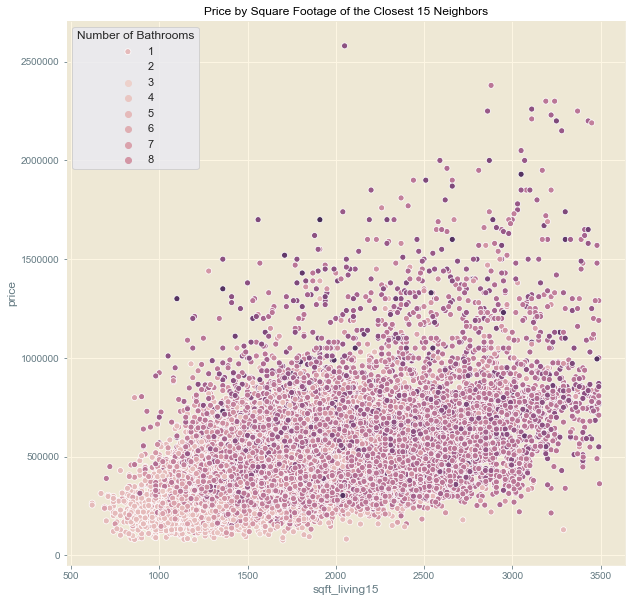

In [72]:
fig10 = plt.figure(figsize=(10,10))
ax1 = fig10.add_subplot(111)
sns.set(palette='colorblind')
ax1 = sns.scatterplot(x=kc_housing_mod_3['sqft_living15'], 
                      y=kc_housing_mod_3['price'], legend='full', hue=kc_housing_mod_3['bathrooms'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bathrooms', loc='upper left', labels=['1', '2', '3', '4', '5', '6', '7', '8'])
fig10.savefig('Price by Square Footage of the Closest 15 Neighbors - bathrooms final model.png')

## Features

The best feature ended up being bathrooms per bedroom out of the three explored. The other two features were sqft_lot / sqft_living15 and bedrooms / sqft_lot.

This feature bathrooms per bedroom is statistically significant, and matches our highest acheived adjusted r-squared value. It also allows for me to make a recommendation to a client about increasing the selling price for their home. I'd like to incorporate this feature into the model.

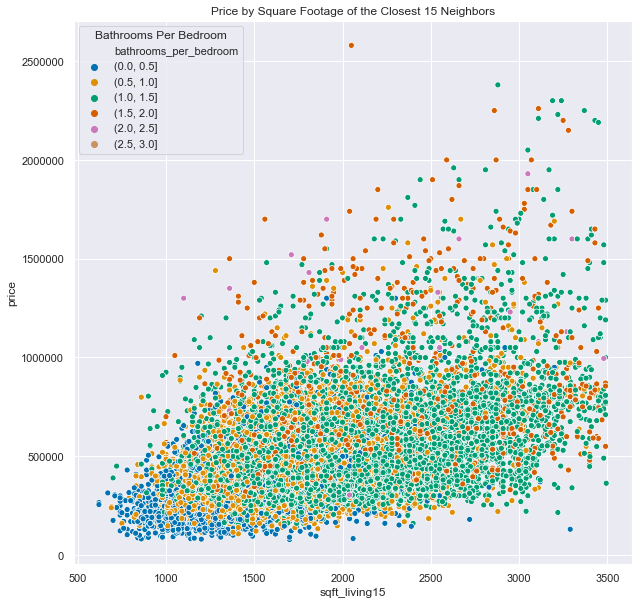

In [85]:
# generating dataframe with values that make sense
kc_housing_mod_8 = pd.concat([kc_housing_mod_3.copy(deep=True), bathrooms_per_bedroom], axis=1)
# creating bins for bathrooms_per_bedroom
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]
# splitting the data
bins_bathrooms = pd.cut(kc_housing_mod_8['bathrooms_per_bedroom'], bins)
kc_housing_mod_8['bathrooms_per_bedroom'] = bins_bathrooms
# kc_housing_mod_8.head()
fig14 = plt.figure(figsize=(10,10))
ax1 = fig14.add_subplot(111)
sns.set(palette='colorblind')
visual4 = kc_housing_mod_8.loc[kc_housing_mod_8['price'] < 3000000]
ax1 = sns.scatterplot(x=visual3['sqft_living15'], 
                      y=visual3['price'], legend='full', hue=visual4['bathrooms_per_bedroom'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Bathrooms Per Bedroom', loc='upper left')
fig14.savefig('Price by Square Footage of the Closest 15 Neighbors Bathrooms per Bedroom.png')

## Regression diagnositics

A few things will be checked in this analysis:
* Normality - check
* Linearity - check for sqft_living15
* Heterskedacity - none present

### Normality Analysis

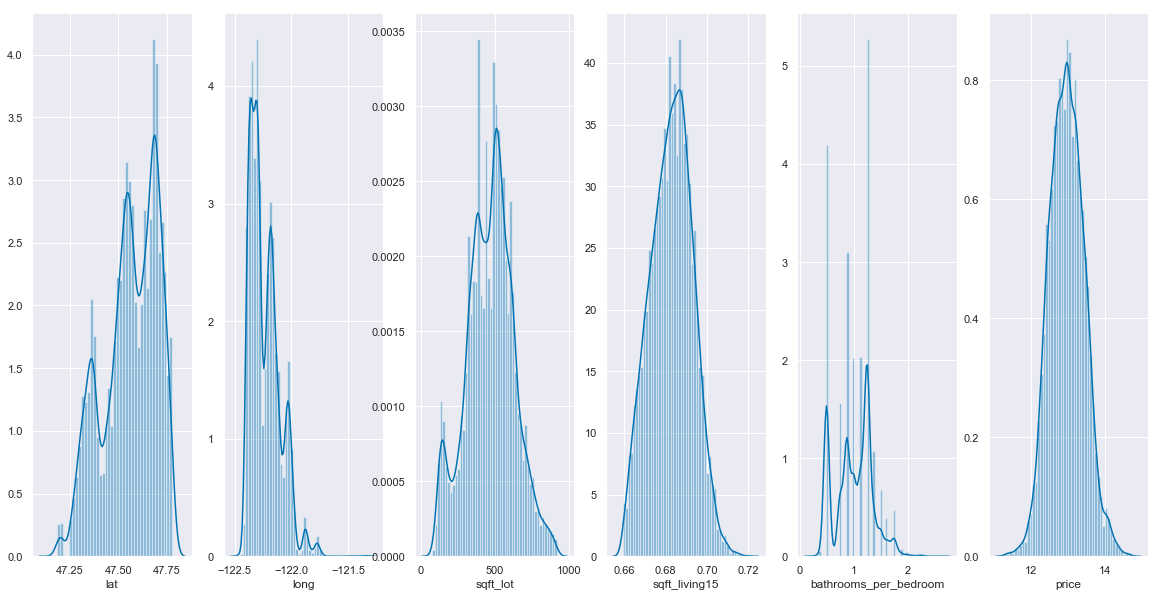

In [87]:
# normality check
fig15 = plt.figure(figsize=(20,10))
ax1 = fig15.add_subplot(161)
sns.distplot(kc_housing_mod_7['lat'])
ax2 = fig15.add_subplot(162)
sns.distplot(kc_housing_mod_7['long'])
ax3 = fig15.add_subplot(163)
sns.distplot(kc_housing_mod_7['sqft_lot'])
ax4 = fig15.add_subplot(164)
sns.distplot(kc_housing_mod_7['sqft_living15'])
ax5 = fig15.add_subplot(165)
sns.distplot(kc_housing_mod_7['bathrooms_per_bedroom'])
ax6 = fig15.add_subplot(166)
sns.distplot(kc_housing_mod_7['price']);

# Evaluation of the Model
## Top Contributing Variable - sqft_living15

In [95]:
# top 1
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

[False False False  True False]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'bathrooms_per_bedroom'], dtype='object')


It seems that the top variable to consider for housing selling price in the Seattle area is sqft_living15. This countdown of most important variables: sqft_living15, lat, long, bathrooms_per_bedroom, and sqft_lot also seem to follow their level of linearity. 
The biggest indicator of price is how big your neighbor's houses are. The second is where your latitude is located. The third biggest indicator of price is your longitude. These are not factors that can easily be changed by a home seller; however, there is hope. The number of bathrooms per bedroom is able to influence price, and this is a change that a home seller could make to increase the value of the home. This model runs with an adjusted r-squared value of 0.844.

## Test-train split

In [100]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.09251744118541212
Test Mean Squarred Error: 0.09105572070763206


In [101]:
percentage = mse_train / mse_test
percentage

1.0160530328728434

This train test split shows that the model is effective. The error is similar, within about 1% of each other.

## Cross Validation of Model

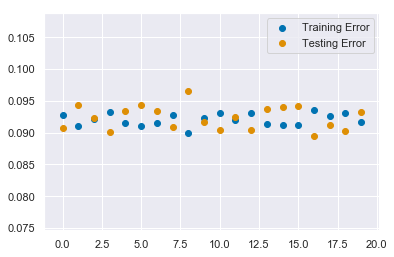

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

These mean squared errors for the test and train split are very close together.

# Implementation of Model

In [104]:
def current_sell_price():
    x = int(xbath) / int(xbed)
    m = 0.0359
    y_current = (m * x)
    return (y_current)
xbath = input('How many bathrooms do you currently have? ')
xbed = input('How many bedrooms do you currently have? ')

How many bathrooms do you currently have? 2
How many bedrooms do you currently have? 3


In [105]:
current_sell_price()

0.023933333333333334

In [106]:
def projected_sell_price():
    x_proj = int(xbath1) / int(xbed1)
    m = 0.0359
    y_projected = (m * x_proj)
    return(y_projected)
xbath1 = input('How many bathrooms would you like to have? ')
xbed1 = input('How many bedrooms would you like to have? ')

How many bathrooms would you like to have? 3
How many bedrooms would you like to have? 3


In [107]:
projected_sell_price()

0.0359

In [108]:
difference = projected_sell_price() - current_sell_price()
difference

0.011966666666666667

From this model, if you increase a 2 bath, 2 bed home to a 3 bath, 2 bed home, that will increase the selling value of the home by $100,950. So plan to renovate for less than that!

## Future Work

Work with time and location data to determine sell information. Additionally, uncover what opinions have to do with selling price.